In [2]:
import pandas as pd

#importing the file
address = r"C:\Users\user\Documents\DataScience\Data\Californai-Cities-master\california_cities.csv"
#reading the file
cities = pd.read_csv(address)
print(cities.head())

   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_p

We’ll use the size of points to indicate the area and populations of California cities

In [3]:
""""
We will be using latd, longd, populating and area.
We want to see the relative population in these cities depending on the latd or longd
"""

latitude, longitude = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

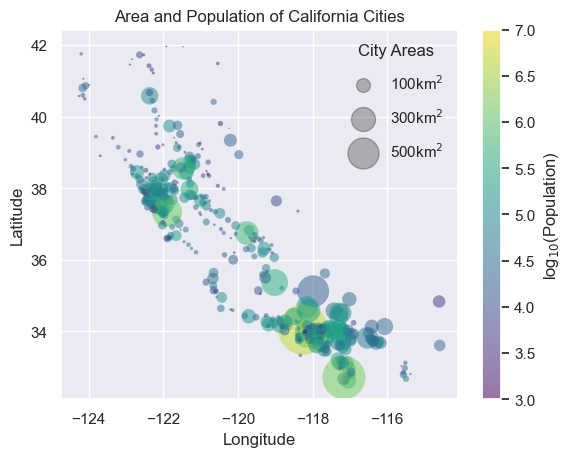

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

plt.scatter(longitude, latitude, label=None,c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
#plt.axis() I had to remove this because it is affecting the overall look of the chart
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='log$_{10}$(Population)')
plt.clim(3,7)

#legend
for area in [100, 300, 500]:
    plt.scatter([],[], c='k', alpha=0.3, s=area, label=str(area) +'km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Areas')
plt.title("Area and Population of California Cities")
plt.show()

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [6]:
latitude, longitude = cities['latd'].values, cities['longd'].values
population, area = cities['population_total'].values, cities['area_total_km2'].values

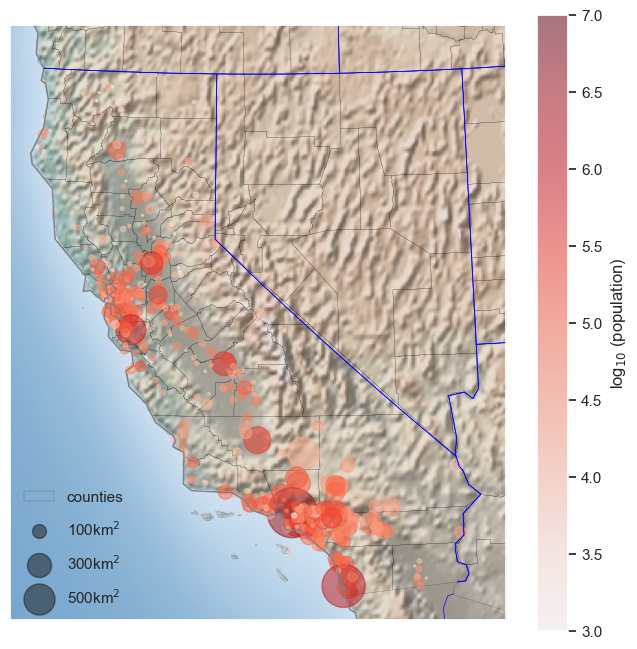

In [7]:
#draw the map background

fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution='l',
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcounties(color='black')
m.drawstates(color='blue')

#scatter the city data just like the chart above
m.scatter(longitude,latitude, latlon=True, 
            c=np.log10(population), s=area,
            cmap='Reds', alpha=0.5)

#create the color band
plt.colorbar(label='log$_{10}$ (population)')
plt.clim(3,7)

#make legend with dummy points
for area in [100, 300, 500]:
    plt.scatter([],[],c='k', alpha=0.5, s=area, label=str(area)+ 'km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');